In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle


In [3]:
import pandas as pd

In [4]:
import networkx as nx


In [5]:
from collections import Counter, defaultdict

# Background

on food

# What I'm Doing

Graph theory and some examples
social network
roads

# Why I'm Doing it

Because ingredients come together as recipes

# Here's What I Did

# Webscraping

# FlavorDB

https://cosylab.iiitd.edu.in/flavordb/entity_details?id=139

Screen cap of this

In [5]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [6]:
flavorDB.head(50)

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
127,5ca27ddc13218a1eabac6455,Berry,"[[sweet, new mown hay, green, tonka, bitte...",sea buckthorns,"[323, 107971, 7284, 10448, 7150, 638011, 8468,...","[coumarin, Daidzin, 2-Methylbutyraldehyde, 3-m...","{cis-3-Hexenal, Isopentyl octanoate, coumarin,...","{5363388, 650, 107971, 11128, 7858, 7775, 323,...",113
133,5ca27de313218a1eabac645b,Seafood,"[[cherry, caramel, nut, phenolic], [apple, ...",clam,"[14511, 8785, 8193, 8163, 8063, 9862, 7909, 79...","[3-Methyl-2-Cyclohexen-1-One, Benzyl Acetate, ...","{3-Ethylpyridine, 3-Methyl-2-Cyclohexen-1-One,...","{12020, 26334, 8129, 9862, 998, 32093, 14511, ...",61
134,5ca27de513218a1eabac645c,Seafood,"[[coconut, wax, fat, waxy, fatty, earthy,...",crab,"[8193, 8063, 5281, 7909, 7501, 7519, 8051, 188...","[1-Dodecanol, Pentanal, stearic acid, 4-Methyl...","{3,5,5-Trimethylhexan-1-ol, Thiazole, Anisole,...","{5311110, 8129, 1130, 454, 9256, 26808, 8094, ...",38
135,5ca27de613218a1eabac645d,Seafood,"[[orange, waxy, fresh, fatty, floral, iri...",crayfish,"[8163, 5283321, 7501, 8051, 18635, 7002, 454, ...","[2-Undecanone, trans,trans-2,4-Heptadienal, St...","{Thiazole, cis-2-Penten-1-ol, Octan-2-one, 2-E...","{8129, 18635, 1130, 5283321, 454, 9256, 26808,...",32
136,5ca27de713218a1eabac645e,Seafood,"[[sweet, new mown hay, green, tonka, bitte...",kelp,"[323, 107971, 7284, 10448, 7150, 638011, 64373...","[coumarin, Daidzin, 2-Methylbutyraldehyde, 3-m...","{cis-3-Hexenal, coumarin, 3-(Methylthio)propio...","{5363388, 650, 107971, 11128, 7858, 323, 15490...",104
137,5ca27de813218a1eabac645f,Seafood,"[[fat, fatty, fruit, fruity, grassy, mush...",krill,"[5352876, 6560, 18827, 18635, 24115, 61295, 62...","[3,5-Octadien-2-one, 2-Methyl-1-propanol, 1-Oc...","{S-Propyl thioacetate, 2-Methoxypyrazine, 3-Et...","{61845, 5321950, 5352876, 18635, 6560, 24115, ...",22
138,5ca27dea13218a1eabac6460,Seafood,"[[lemon, citrus, soap, orange peel, fat, ...",lobster,"[454, 15380, 6202, 644104, 8094, 1130]","[Octanal, Bis(methylthio)methane, Thiamine Hyd...","{Thiamine Hydrochloride, CID 644104, Bis(methy...","{15380, 1130, 644104, 454, 6202, 8094}",6
139,5ca27deb13218a1eabac6461,Seafood,"[[alcohol, rose, pungent, cognac, green, ...",mollusc,"[8025, 6202, 7749, 7945, 644104, 8094, 429065,...","[Ethyl Formate, Thiamine Hydrochloride, Ethyl ...","{Ethyl Crotonate, Methyl octanoate, Methyl Pro...","{7826, 1130, 8158, 7749, 11124, 429065, 31284,...",20
140,5ca27dec13218a1eabac6462,Seafood,"[[hazelnut, cinnamon], [fatty, mushroom, ch...",oyster,"[5283321, 679, 5352876, 8051, 643731, 18827, 5...","[trans,trans-2,4-Heptadienal, dimethyl sulfoxi...","{trimethylamine, Ethyl Vinyl Ketone, 1-Octen-3...","{12020, 5352876, 1130, 5283321, 454, 1123, 312...",29
141,5ca27ded13218a1eabac6463,Seafood,"[[sulfur, sulfurous, garlic, green, horser...",prawn,[15380],[Bis(methylthio)methane],{Bis(methylthio)methane},{15380},1


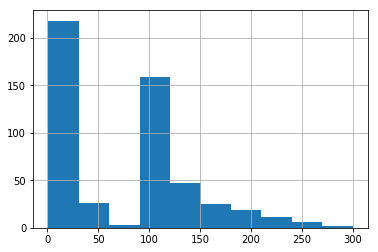

In [7]:
flavorDB["molecule_quantity"].hist()

In [8]:
flavorDB.shape

(516, 9)

In [9]:
flavorDB.groupby("category")["ingredient"].count()

category
Berry                42
Cabbage              16
Fish                120
Fruit                82
Fruit Citrus         10
Fruit Essence         1
Fungus               11
Herb                 51
Meat                 46
Nut                  21
Plant Derivative     20
Seafood              35
Spice                25
Vegetable            24
Vegetable Fruit       4
Vegetable Root        8
Name: ingredient, dtype: int64

In [13]:
list_of_categories = ['Berry', 'Cabbage', 'Fish', 'Fruit', 'Fruit Citrus', 'Fruit Essence', 'Fungus', 'Herb', 'Meat', 'Nut', 'Plant Derivative', 'Seafood', 'Spice', 'Vegetable', 'Vegetable Fruit', 'Vegetable Root']

In [15]:
"""
takes a while to process, so commented out
"""
# list_of_category_ratios = []
# for category in list_of_categories:
#     if len(ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"]) > 1:
#         list_of_ingredients_per_category = ingredient_only_pd[ingredient_only_pd["category"] == category]["ingredient"].tolist()
#         ratio_total = 0
#         for combo in combinations(list_of_ingredients_per_category, 2):
#             ratio, x, y, z = common_pair_analysis(combo[0], combo[1])
#             ratio_total += ratio
#         category_ratio = ratio_total / len(list(combinations(list_of_ingredients_per_category, 2)))
#         list_of_category_ratios.append(category_ratio)
#         print("Ratio for {}: ".format(category), category_ratio)

'\ntakes a while to process, so commented out\n'

Ratio for Berry:  0.35719197257990054
Ratio for Fish:  0.41460354837905844
Ratio for Fruit:  0.3786900657335132
Ratio for Fruit Citrus:  0.3884684724638544
Ratio for Fungus:  0.41409691629955947
Ratio for Herb:  0.5326167800571301
Ratio for Meat:  0.13390955730473256
Ratio for Nut:  0.5507713353522316
Ratio for Plant Derivative:  0.09379168158647629
Ratio for Seafood:  0.16144490977143952
Ratio for Spice:  0.4443326703423937
Ratio for Vegetable:  0.5939392378952064
Ratio for Vegetable Root:  0.6347922930979436

Do the ratio for two random ingredients as well

# Making a Graph
graph that has ingredients as nodes and edges if the ratio is above a certain level

simple_graph of two ingredients

In [94]:
my_graph = graph_based_on_shared_molecule_creator(pandas_df= flavorDB, min_intersection_ratio= 0.15)

In [95]:
my_graph.number_of_nodes()

515

In [96]:
my_graph.number_of_edges()

48388

In [97]:
nx.number_connected_components(my_graph)

39

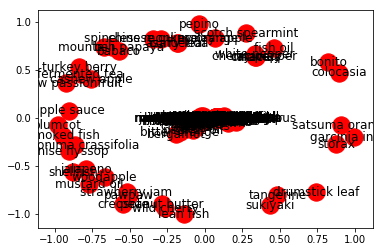

In [98]:
nx.draw_networkx(my_graph)

In [93]:
for comp in nx.connected_components(my_graph):
    print(comp)

{'common verbena', 'coriander', 'tea leaf willow', 'chinese chestnut', 'guava', 'loquat', 'lime', 'turmeric', 'rutabaga', 'dock', 'hedge mustard', 'breadnut tree seed', 'black huckleberry', 'garden cress', 'butternut', 'mint', 'papaya', 'muscadine grape', 'hogplum', 'berry', 'abalone', 'mushroom', 'tamarind', 'strawberry', 'allspice', 'grape', 'gooseberry', 'nutmeg', 'cabbage', 'linden', 'kelp', 'oyster mushroom', 'pineapple', 'kai lan', 'maitake', 'squid', 'european chestnut', 'kombu', 'crayfish', 'ginseng', 'parsley', 'lemon verbena', 'rowanberry', 'pitanga', 'pepper', 'black crowberry', 'celery', 'malabar plum', 'musk melon', 'endive', 'white currant', 'oyster', 'melon', 'common persimmon', 'cherry tomato', 'blackberry', 'pear', 'cherry', 'lemon balm', 'carom seed', 'leek', 'cupua\x8du', 'red algae', 'kale', 'fish', 'saffron', 'japanese pumpkin', 'quince', 'purple mangosteen', 'burdock', 'natal plum', 'apricot', 'rhubarb', 'vanilla', 'chard', 'japanese persimmon', 'teff', 'cinnamon'

# Keep only the biggest connected component

In [64]:
#only keep the biggest connected component
giant = max(nx.connected_component_subgraphs(my_graph), key=len)

In [65]:
nx.number_connected_components(giant)

1

In [66]:
giant.number_of_edges()

48382

In [67]:
giant.number_of_nodes()

472

In [82]:
category_list = []
category_dict = defaultdict(list)


for node in giant.nodes():
    category = giant.nodes[node]["category"]
    category_dict[category].append(node)
    category_list.append(category)

In [83]:
print(category_dict)


defaultdict(<class 'list'>, {'Berry': ['sea buckthorns', 'berry', 'bilberry', 'blackberry', 'blueberry', 'cherry', 'bitter cherry', 'sour cherry', 'cloudberry', 'cranberry', 'gooseberry', 'lingonberry', 'loganberry', 'raspberry', 'strawberry', 'black crowberry', 'black huckleberry', 'mulberry', 'black mulberry', 'red raspberry', 'black raspberry', 'cherry tomato', 'rowanberry', 'sparkleberry', 'bayberry', "elliott's blueberry", 'canada blueberry', 'deerberry', 'jostaberry', 'acerola', 'squashberry', 'groundcherry', 'ohelo berry', 'pitanga', 'salmonberry', 'mexican groundcherry', 'boysenberry', 'chinese bayberry', 'saskatoon berry', 'nanking cherry'], 'Seafood': ['clam', 'crab', 'crayfish', 'kelp', 'krill', 'lobster', 'mollusc', 'oyster', 'prawn', 'scallop', 'shrimp', 'trassi', 'red king crab', 'common octopus', 'irish moss', 'leather chiton', 'north pacific giant octopus', 'spotted seal', 'sea cucumber', 'steller sea lion', 'bearded seal', 'ringed seal', 'whelk', 'spiny lobster', 'biva

In [84]:
print(Counter(category_list))

Counter({'Fish': 116, 'Fruit': 66, 'Herb': 48, 'Meat': 45, 'Berry': 40, 'Seafood': 34, 'Vegetable': 22, 'Nut': 21, 'Spice': 19, 'Cabbage': 16, 'Plant Derivative': 15, 'Fungus': 11, 'Fruit Citrus': 8, 'Vegetable Root': 8, 'Vegetable Fruit': 2, 'Fruit Essence': 1})


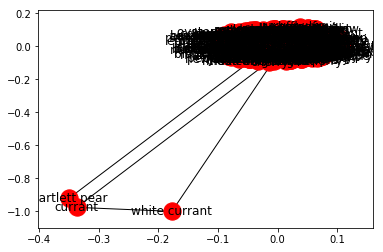

In [29]:
nx.draw_networkx(giant)

In [85]:
degree_dict = dict(giant.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    472.000000
mean     205.008475
std       76.532828
min        1.000000
25%      166.000000
50%      262.000000
75%      262.000000
max      268.000000
dtype: float64

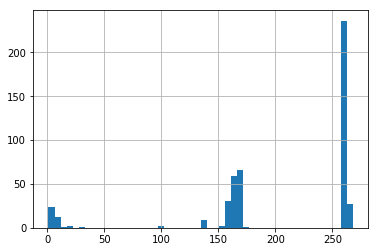

In [86]:
degree_series[degree_series < 400].hist(bins=50)

In [87]:
Counter(nx.degree_centrality(giant)).most_common(5)


[('mushroom', 0.5690021231422505),
 ('peanut', 0.5668789808917197),
 ('pecans', 0.564755838641189),
 ('red currant', 0.5626326963906582),
 ('black currant', 0.5605095541401274)]

#Girvan Newman

In [100]:
with open('./data/graph/ingredients_with_most_shared_molecules.graph', 'wb') as file:
    file.write(pickle.dumps(giant))
    file.close()

GIRVAN NEWMAN

In [13]:
pickle_in = open("./data/graph/community_girvan_newman.graph","rb")

#Getting the dictionary from the pickle
girvan_newman = pickle.load(pickle_in)

In [14]:
nx.number_connected_components(girvan_newman)

3

In [15]:
for comp in nx.connected_components(girvan_newman):
    print(comp)

{'winter squash', 'strawberry', 'tarragon', 'beef', 'mixed nuts', 'capsicum', 'teff', 'apricot', 'hogplum', 'wakame', 'broccoli', 'jostaberry', 'pili nut', 'fenugreek', 'clove', 'celery', 'passionfruit', 'vinegar', 'beef processed', 'rocket salad', 'persimmon', 'shallot', 'japanese persimmon', 'marjoram', 'black raspberry', 'kai lan', 'breadnut tree seed', 'mutton', 'pistachio', 'currant', 'cherimoya', 'bitter cherry', 'rosemary', 'green beans', 'kohlrabi', 'red raspberry', 'nance', 'papaya', 'eggplant', 'black mulberry', 'epazote', 'abalone', 'hedge mustard', 'dates', 'malabar plum', 'narrowleaf cattail', 'red currant', 'anise', 'buckwheat', 'burbot', 'krill', 'grapefruit', 'chard', 'cassia', 'japanese pumpkin', 'ohelo berry', 'pear', 'cloudberry', 'prairie turnip', 'filbert', 'mexican oregano', 'kumquat', 'plum', 'roseapple', 'beech nut', 'american butterfish', "jew's ear", 'cabbage', 'turnip', 'kelp', 'peach', 'allspice', 'kale', 'borage', 'guava', 'buffalo currant', 'oregano', 'lem

Image GIRVAN NEWMAN WITH CATEGORIES

In [30]:
for comp in nx.connected_components(my_graph):
    print(comp)

{'leek', 'avocado', 'winter savory', 'dill', 'quince', 'chinese chestnut', 'sorrel', 'abalone', 'roselle', 'onion', 'kiwifruit', 'poppy seed', 'chia', 'cardamom', 'breadfruit', 'peanut', 'loganberry', 'apricot', 'macadamia nut', 'chive', 'basil', 'rambutan', 'wakame', 'fennel', 'purple mangosteen', 'soursop', 'mint', 'thyme', 'blueberry', 'yellow zucchini', 'cashew nut', 'tea leaf willow', 'cinnamon', 'durian', 'naranjilla', 'walnut', 'blackberry', 'hogplum', 'pummelo', 'sparkleberry', 'chard', 'persimmon', 'natal plum', 'mustard', 'starfruit', 'squashberry', 'epazote', 'artemisia', 'enokitake', 'malabar spinach', 'pepper c. baccatum', 'coconut', "elliott's blueberry", 'rapini', 'jute', 'cumin', 'turmeric', 'brazil nut', 'pomegranate', 'narrowleaf cattail', 'great horned owl', 'summer savory', 'european chestnut', 'pitanga', 'garlic', 'clove', 'rhubarb', 'rutabaga', 'cabbage', 'bilberry', 'anise', 'water chestnut', 'ohelo berry', 'black crowberry', 'purple laver', 'mulberry', 'mushroom

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


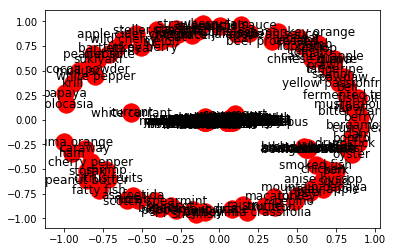

In [27]:
nx.draw_networkx(my_graph)

Maybe do something with molecules as nodes and then within an ingredient being an edge

# Recipe Puppy

In [10]:
pickle_in = open("./data/pandas/recipe_puppy_pandas.pickle","rb")

#Getting the dictionary from the pickle
recipe_puppy = pickle.load(pickle_in)

In [11]:
recipe_puppy.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg
5,5caa762213218a112b0b97a4,"[celery, dijon mustard, egg, mayonnaise, papri...",http://www.recipezaar.com/Egg-Salad-Sandwich-D...,Egg Salad Sandwich (Diabetic),egg


In [13]:
recipe_puppy.shape

(111269, 5)

# Cleaning Up The Data

# Text Processing

stop ingredient removal

stemming and lemitization

more nlp stuff

# Graph Building

# Graph Analysis

eigen Vector centrality

# Recommender

# Interpretation